 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#第5章:-係り受け解析" data-toc-modified-id="第5章:-係り受け解析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>第5章: 係り受け解析</a></span><ul class="toc-item"><ul class="toc-item"><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#40.-係り受け解析結果の読み込み（形態素）" data-toc-modified-id="40.-係り受け解析結果の読み込み（形態素）-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>40. 係り受け解析結果の読み込み（形態素）</a></span></li><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#41.-係り受け解析結果の読み込み（文節・係り受け）" data-toc-modified-id="41.-係り受け解析結果の読み込み（文節・係り受け）-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>41. 係り受け解析結果の読み込み（文節・係り受け）</a></span></li><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#42.-係り元と係り先の文節の表示" data-toc-modified-id="42.-係り元と係り先の文節の表示-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>42. 係り元と係り先の文節の表示</a></span></li><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#43.-名詞を含む文節が動詞を含む文節に係るものを抽出" data-toc-modified-id="43.-名詞を含む文節が動詞を含む文節に係るものを抽出-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>43. 名詞を含む文節が動詞を含む文節に係るものを抽出</a></span></li><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#44.-係り受け木の可視化" data-toc-modified-id="44.-係り受け木の可視化-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>44. 係り受け木の可視化</a></span></li><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#45.-動詞の格パターンの抽出" data-toc-modified-id="45.-動詞の格パターンの抽出-1.0.6"><span class="toc-item-num">1.0.6&nbsp;&nbsp;</span>45. 動詞の格パターンの抽出</a></span></li><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#46.-動詞の格フレーム情報の抽出" data-toc-modified-id="46.-動詞の格フレーム情報の抽出-1.0.7"><span class="toc-item-num">1.0.7&nbsp;&nbsp;</span>46. 動詞の格フレーム情報の抽出</a></span></li><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#47.-機能動詞構文のマイニング" data-toc-modified-id="47.-機能動詞構文のマイニング-1.0.8"><span class="toc-item-num">1.0.8&nbsp;&nbsp;</span>47. 機能動詞構文のマイニング</a></span></li><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#48.-名詞から根へのパスの抽出" data-toc-modified-id="48.-名詞から根へのパスの抽出-1.0.9"><span class="toc-item-num">1.0.9&nbsp;&nbsp;</span>48. 名詞から根へのパスの抽出</a></span></li><li><span><a href="http://localhost:8890/notebooks/t-tagami/Chapter_5/Chapter_5.ipynb#49.-名詞間の係り受けパスの抽出" data-toc-modified-id="49.-名詞間の係り受けパスの抽出-1.0.10"><span class="toc-item-num">1.0.10&nbsp;&nbsp;</span>49. 名詞間の係り受けパスの抽出</a></span></li></ul></ul></li></ul></div>

# 第5章: 係り受け解析

In [1]:
from pprint import pprint
from itertools import groupby
from itertools import islice
import CaboCha
from cytoolz import nth

In [2]:
!wget http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt -P ../data

--2017-07-31 12:41:37--  http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt
Resolving www.cl.ecei.tohoku.ac.jp... 130.34.192.83
Connecting to www.cl.ecei.tohoku.ac.jp|130.34.192.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965825 (943K) [text/plain]
Saving to: ‘../data/neko.txt.1’

neko.txt.1          100%[===================>] 943.19K  --.-KB/s    in 0.1s    

2017-07-31 12:41:38 (7.38 MB/s) - ‘../data/neko.txt.1’ saved [965825/965825]



In [3]:
!cabocha -f1 ../data/neko.txt -o ../data/neko.txt.cabocha

In [4]:
!head -10 data/neko.txt.cabocha

* 0 -1D 0/0 0.000000
一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
* 0 2D 0/0 -0.764522
　	記号,空白,*,*,*,*,　,　,　
* 1 2D 0/1 -0.764522
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 2 -1D 0/2 0.000000


In [5]:
# オブジェクト指向界隈は闇が深い
# データ型と関数が紐づいていると便利
# chainer使うならオブジェクト指向が必要
# クラス外からクラス内にアクセスするのは良くない→クラス内にメソッドを作る
# @classmethod? →　インスタンスがなくても使えるメソッド　
# startswith('* ')にすると文中に*が出てきてもおk
#__repr__メソッド → デバッグ用にそこそこ詳しい情報を載せる
#return self → インスタンスが返ってくる → returnしなくても大丈夫
#Enum → 列挙型 → enumの肝は値に名前をつけられる
#namedtuple → 名前付きのタプルを作る → enumと似てるけど初期値が必要でめんどくさい
#テスト → プログラミング界隈でのプログラムを試すこと http://qiita.com/phimcall/items/7378ec86fbabdca83257
#全ての関数にtestを書け
assert(1)
#assert(0) → Falseだとエラー返してくれる
hoge = 'abc'
hoge.replace('b', 'd', 1) #1回だけ置換→高速化のテクニック
#アンパック代入
hoge1, hoge2, *hoge3 = [1, 2, 3, 4, 5]
print(hoge1, hoge2, hoge3)

print([1, 2])
print(*[1, 2])

def foo(bar, baz):
    return bar + baz
foo(bar=1, baz=2)
d = {'foo':1, 'bar':2}
foo(*d)
# foo(**d)
from cytoolz import nth #isliceと違ってピンポイントで持ってこれる
#インスタンスメソッドの変数はの一つ目はselfと書くのがお作法
#flagは普通is_なんたらにする
#mutableな変数を引数にしない e.g.リストとか
#YSNRコード → chunkの数がわかってるからリストの数を確保している
[[]]*3
#ファイルに保存しておけばいちいちShift*Enterがいらない
wa = [1]
wa += [2]
print(wa)
#srcsを保存する辞書はdefault dictを使うと少し楽かも
#sentenceクラスを定義するのもありらしい

#こうすると少し速い
list_hoge = []
hoge_append = list_hoge.append
hoge_append([1])

#クラスにはヘルパーという概念がある

#クラス変数とインスタンス変数
#クラス利用者としてインスタンス化の手段が一つではないほうがいい
#Morph(line)
#m = Morph.from_line(line)
#Morph(base, surface, pos, pos1)だと応用が利かない

from collections.abc import Sequence
#便利らしい　時間があまりに余ったら

#dp → 動的計画法
#@lru_cache → デコレータ
#max_sizeで指定した個数だけ引数を保持できる

#関数ではなくクラスのメソッドにしておくと一手間省ける 関数だけで頑張るのはC言語時代のコード
#classメソッドをいじるならクラス内に書く 
#is_verbじゃなくてcontain_verbだなこれは

#anyとall こんなのあったな

import argparse
#unixのごとく任意の引数を与えることができる
#コマンドレベルから引数名付きで実行できる　他の人に渡す時にも便利 チュートリアル読んでおく

from string import punctuation
from string import printable
#句読点を除きたい時とかに便利

print(set(punctuation))

1 2 [3, 4, 5]
[1, 2]
1 2
[1, 2]
{'-', '%', "'", '[', '$', ']', '~', '#', '|', '{', ':', ';', '.', '\\', '/', '+', '=', '>', '"', '?', ',', ')', '^', '}', '_', '@', '<', '!', '&', '(', '`', '*'}


### 40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，CaboChaの解析結果（neko.txt.cabocha）を読み込み，各文をMorphオブジェクトのリストとして表現し，3文目の形態素列を表示せよ．

In [6]:
class Morph():
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
    
    @classmethod
    def make_morph(cls, line):
        line_list = line.rstrip().replace('\t', ',').split(',')
        return (Morph(line_list[0], line_list[7],
                     line_list[1], line_list[2]))
    @classmethod
    def get_morph_list(cls, sentence):
        morph_list = []
        for line in sentence:
            if not line.startswith('* '): morph_list.append(Morph.make_morph(line))
        if morph_list: return morph_list
    
    def __str__(self):
        return ('{}\t{}\t{}\t{}'.format(self.surface, self.base, self.pos, self.pos1))
        
def read_txt_cabocha():
    with open('data/neko.txt.cabocha') as f_text:
        for is_EOS, grouped in groupby(f_text, key=lambda x:x.rstrip() == 'EOS'):
            if not is_EOS: yield list(grouped)
        
def make_morph_object():
    for sentence in read_txt_cabocha(): yield Morph.get_morph_list(sentence)

In [7]:
for sentence in nth(3, make_morph_object()): print(sentence)

　	　	記号	空白
どこ	どこ	名詞	代名詞
で	で	助詞	格助詞
生れ	生れる	動詞	自立
た	た	助動詞	*
か	か	助詞	副助詞／並立助詞／終助詞
とんと	とんと	副詞	一般
見当	見当	名詞	サ変接続
が	が	助詞	格助詞
つか	つく	動詞	自立
ぬ	ぬ	助動詞	*
。	。	記号	句点


### 41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストのCaboChaの解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，8文目の文節の文字列と係り先を表示せよ．第5章の残りの問題では，ここで作ったプログラムを活用せよ．

In [8]:
class Chunk():
    def __init__(self):
        self.morphs = []
        self.dst = ''
        self.srcs = []
        self.idx = ''
        
    def set_dst_idx(self, line_list):
        self.dst = int(line_list[2].rstrip('D'))
        self.idx = int(line_list[1])
    
    def set_morphs(self, line):
        self.morphs.append(Morph.make_morph(line))
        
    def set_srcs(self, result_list):
        for line in result_list:
            if line.dst != -1: result_list[line.dst].srcs.append(line.idx)
            
    def contain_pos(self, parts):
        for morph in self.morphs:
            if morph.pos == parts: return True
        return False
    
    def contain_sahen_wo(self):
        for i1 in range(len(self.morphs)-1):
            if self.morphs[i1].pos1 == 'サ変接続' and self.morphs[i1+1].surface == 'を': return True
        return False
        
    def get_morph_surface(self):
        return ''.join(morph.surface for morph in self.morphs if not morph.pos == '記号')
    
    def get_surf_pos(self, fpos):
        temp = ''
        for morph in self.morphs:
            if morph.pos == fpos: temp = morph.surface
        return temp

    def get_left_base(self, fpos):
        for morph in self.morphs:
            if morph.pos == fpos: return morph.base
        
    @classmethod
    def get_chunk_object(cls, sentence):
        result_list = []
        temp = Chunk()
        for line in sentence:
            if line.startswith('* '):
                if temp.dst:
                    result_list.append(temp)
                    temp = Chunk()
                temp.set_dst_idx(line.split())
            else: temp.set_morphs(line)
        result_list.append(temp)
        temp.set_srcs(result_list)
        return result_list
        
    def extract_path_to_root(self):
        chunk_list = [chunk]
        while chunk_list[-1].dst != -1:
            chunk_list.append(sentence[chunk_list[-1].dst])
        return (' -> '.join(i1.get_morph_surface() for i1 in chunk_list) + '\n')
    
    def replace_surface(self, f_char):
        surfaces = ''
        for morph in self.morphs:
            if morph.pos == '名詞': surfaces += f_char
            elif morph.pos != '記号': surfaces += morph.surface.lstrip('\u3000X')
            else: pass
        return surfaces
    
    @classmethod
    def get_noun_clause_idx(cls, sentence):
        return [chunk.idx for chunk in sentence if chunk.contain_pos('名詞')]
    
    def __str__(self):
        return ''.join(morph.surface for morph in self.morphs if not morph.pos == '記号')
    
def make_chunk_object_list():
    for sentence in read_txt_cabocha():
        yield Chunk.get_chunk_object(sentence)

In [9]:
for sentence in nth(7, make_chunk_object_list()):
    print('係り先', sentence.dst, '係り元', sentence.srcs, sentence)

係り先 1 係り元 [] この
係り先 7 係り元 [0] 書生というのは
係り先 4 係り元 [] 時々
係り先 4 係り元 [] 我々を
係り先 5 係り元 [2, 3] 捕えて
係り先 6 係り元 [4] 煮て
係り先 7 係り元 [5] 食うという
係り先 -1 係り元 [1, 6] 話である


### 42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [10]:
with open('work/42_result.txt', 'w') as f_42:
    for sentence in make_chunk_object_list():
        for chunk in sentence:
            if chunk.dst != -1: f_42.write('{}\t{}\n'.format(chunk, sentence[chunk.dst]))

In [11]:
!head work/42_result.txt
!cat work/42_result.txt | wc -l

	猫である
吾輩は	猫である
名前は	無い
まだ	無い
どこで	生れたか
生れたか	つかぬ
とんと	つかぬ
見当が	つかぬ
何でも	薄暗い
薄暗い	所で
   71772


### 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [12]:
with open('work/43_result.txt', 'w') as f_43:
    for sentence in make_chunk_object_list():
        for chunk in sentence:
            if chunk.dst != -1 and chunk.contain_pos('名詞') and sentence[chunk.dst].contain_pos('動詞'):
                    f_43.write('{}\t{}\n'.format(chunk, sentence[chunk.dst]))

In [13]:
!head work/43_result.txt
!cat work/43_result.txt | wc -l

どこで	生れたか
見当が	つかぬ
所で	泣いて
ニャーニャー	泣いて
いた事だけは	記憶している
吾輩は	見た
ここで	始めて
ものを	見た
あとで	聞くと
我々を	捕えて
   29106


### 44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい

In [14]:
from graphviz import Digraph
from IPython.display import Image

def make_dot_graph(sentence):
    G = Digraph(format = 'png')
    G.attr('node', shape='ellipse')
    for chunk in sentence:
        G.node(str(chunk.idx), chunk.get_morph_surface()) 
        if chunk.dst != -1: G.edge(str(chunk.idx), str(chunk.dst))
    print(G.source) #dot言語を表示
    G.render('../work/tree') 

digraph {
	node [shape=ellipse]
	0 [label="この"]
		0 -> 1
	1 [label="書生というのは"]
		1 -> 7
	2 [label="時々"]
		2 -> 4
	3 [label="我々を"]
		3 -> 4
	4 [label="捕えて"]
		4 -> 5
	5 [label="煮て"]
		5 -> 6
	6 [label="食うという"]
		6 -> 7
	7 [label="話である"]
}


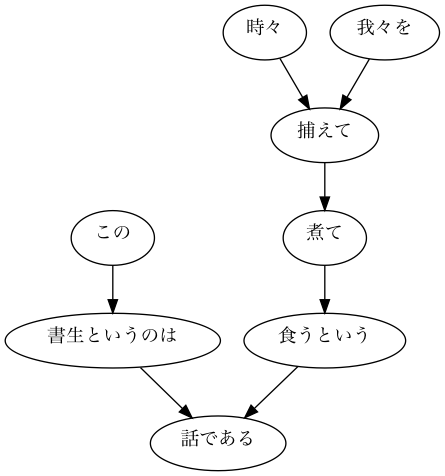

In [15]:
for sentence in islice(make_chunk_object_list(), 7, 8): make_dot_graph(sentence)
Image(filename = '../work/tree.png')

### 45. 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．
* 動詞を含む文節において，最左の動詞の基本形を述語とする
* 述語に係る助詞を格とする
* 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．
* 始める  で
* 見る    は を

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．
* コーパス中で頻出する述語と格パターンの組み合わせ
* 「する」「見る」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [16]:
def extract_case_pattern():
    for sent in make_chunk_object_list():
        for chunk in filter(lambda x: x.contain_pos('動詞'), sent):
            particles = ' '.join([sent[src].get_surf_pos('助詞') 
                                  for src in chunk.srcs if sent[src].contain_pos('助詞')])
            yield '{}\t{}\n'.format(chunk.get_left_base('動詞'), particles)

In [17]:
with open('work/45_result.txt', 'w') as f_45:
    for i1 in extract_case_pattern(): f_45.write(i1)

In [18]:
! head work/45_result.txt

生れる	で
つく	か が
する	
泣く	で
する	て は
始める	で
見る	は を
聞く	で
捕える	を
煮る	て


In [19]:
! cat work/45_result.txt | sort | uniq -c | sort -nr 2> /dev/null | head -30
#sortして重複行をひとまとまりにしてuniqでまとめる uniqのcは重複数を先頭に付加
#sort -nrで数値で降順にsort broken pipe対策 http://qiita.com/kkdd/items/f9829af2fbb9c3c980da

 704 云う	と
 452 する	を
 435 する	
 333 思う	と
 202 ある	が
 199 なる	に
 188 する	に
 175 見る	て
 159 する	と
 122 云う	
 117 する	が
 108 なる	
  98 見る	を
  97 見える	と
  94 ある	
  89 いる	
  88 する	て を
  85 する	は
  80 見る	
  67 聞く	
  61 する	を に
  61 する	て
  60 もつ	を
  60 する	も
  57 ある	の
  56 云う	を
  54 する	が を
  52 する	に を
  52 行く	へ
  52 ある	も


In [20]:
! cat work/45_result.txt | grep -E 'する|見る|与える' | sort | uniq -c | sort -r | head -30
#grep -E　のEは拡張正規表現使うため

 452 する	を
 435 する	
 188 する	に
 175 見る	て
 159 する	と
 117 する	が
  98 見る	を
  88 する	て を
  85 する	は
  80 見る	
  61 する	を に
  61 する	て
  60 する	も
  54 する	が を
  52 する	に を
  51 する	から
  44 する	と を
  44 する	で を
  40 する	の
  37 する	は を
  36 する	で
  33 する	から を
  25 する	と が
  23 見る	て て
  23 する	は に
  22 する	て に
  21 する	と は
  21 する	が に
  20 見る	から
  19 する	と は を


### 46. 動詞の格フレーム情報の抽出
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

* 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
* 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる
「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．
```
始める  で      ここで
見る    は を   吾輩は ものを
```


In [21]:
def extract_case_frame():
    for sent in make_chunk_object_list():
        for chunk in filter(lambda x: x.contain_pos('動詞'), sent):
            particles = ' '.join([sent[src_num].get_surf_pos('助詞') 
                                  for src_num in chunk.srcs if sent[src_num].contain_pos('助詞')])
            terms = ' '.join([sent[src_num].get_morph_surface() 
                              for src_num in chunk.srcs if sent[src_num].contain_pos('助詞')])
            if particles: yield '{}\t{}\t{}\n'.format(chunk.get_left_base('動詞'), particles, terms)

In [22]:
with open('work/46_result.txt', 'w') as f_46:
    for i1 in extract_case_frame(): f_46.write(i1)

In [23]:
!head work/46_result.txt

生れる	で	どこで
つく	か が	生れたか 見当が
泣く	で	所で
する	て は	泣いて いた事だけは
始める	で	ここで
見る	は を	吾輩は ものを
聞く	で	あとで
捕える	を	我々を
煮る	て	捕えて
食う	て	煮て


### 47. 機能動詞構文のマイニング
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

* 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
* 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
* 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
* 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）
例えば「別段くるにも及ばんさと、主人は手紙に返事をする。」という文から，以下の出力が得られるはずである．
```
返事をする      と に は        及ばんさと 手紙に 主人は
```
このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

* コーパス中で頻出する述語（サ変接続名詞+を+動詞）
* コーパス中で頻出する述語と助詞パターン

In [24]:
def mine_light_verb_construction():
    for sent in make_chunk_object_list():
        for chunk in filter(lambda x: x.contain_pos('動詞'), sent):
            temp = ' '.join([sent[src_num].get_morph_surface() for src_num in chunk.srcs if sent[src_num].contain_sahen_wo()])
            if temp:
                particles = ' '.join([sent[src_num].get_surf_pos('助詞') for src_num in chunk.srcs
                                      if sent[src_num].contain_pos('助詞') and not sent[src_num].contain_sahen_wo()])
                terms = ' '.join([sent[src_num].get_morph_surface() for src_num in chunk.srcs
                                  if sent[src_num].contain_pos('助詞') and not sent[src_num].contain_sahen_wo()])
                yield '{}{}\t{}\t{}\n'.format(temp, chunk.get_left_base('動詞'), particles, terms)

In [25]:
with open('work/47_result.txt', 'w') as f_47:
    for i1 in mine_light_verb_construction(): f_47.write(i1)

In [26]:
!head work/47_result.txt

決心をする	と	こうと
返報をする	んで	偸んで
昼寝をする		
昼寝をする	が	彼が
迫害を加える	て	追い廻して
家族的生活をする	が を	我等猫族が 愛を
話をする		
投書をする	て へ	やって ほととぎすへ
話をする	に	時に
写生をする		


In [27]:
! cut -f 1 work/47_result.txt | sort | uniq -c | sort -nr | head -30

  29 返事をする
  21 挨拶をする
  14 真似をする
  14 話をする
  11 喧嘩をする
   8 質問をする
   7 運動をする
   6 昼寝をする
   6 話を聞く
   5 質問をかける
   5 相談をする
   5 病気をする
   5 注意をする
   5 問答をする
   4 いたずらをする
   4 御辞儀をする
   4 休養を要する
   4 演説をする
   4 欠伸をする
   3 一大活躍を試みる
   3 落着を告げる
   3 深入りをする
   3 御化粧をする
   3 往来をあるく
   3 同情を表する
   3 降参をする
   3 遠慮をする
   3 議論をする
   3 講釈をする
   3 講義をする


In [28]:
! cut -f 1,2 work/47_result.txt | sort | uniq -c | sort -nr | head -30

   8 真似をする	
   6 返事をする	と
   6 運動をする	
   4 挨拶をする	から
   4 挨拶をする	と
   4 返事をする	
   4 喧嘩をする	
   4 話を聞く	
   3 質問をかける	と は
   3 返事をする	は と
   3 喧嘩をする	と
   3 話をする	
   2 御無沙汰をする	
   2 いたずらをする	
   2 同情を表する	と は て
   2 休養を要する	は
   2 深入りをする	
   2 挨拶をする	と も
   2 議論をする	て
   2 講義をする	で
   2 覚悟をする	と
   2 挨拶をする	で
   2 安心を得る	が
   2 遠慮をする	
   2 行動をとる	
   2 病気をする	
   2 注意を惹く	
   2 散歩をする	
   2 挨拶をする	
   2 平均を破る	


### 48. 名詞から根へのパスの抽出
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

* 各文節は（表層形の）形態素列で表現する
* パスの開始文節から終了文節に至るまで，各文節の表現を"->"で連結する
「吾輩はここで始めて人間というものを見た」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．
```
吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た
```

In [29]:
def extract_path_to_root():
    for sent in make_chunk_object_list():
        for chunk in filter(lambda x: x.contain_pos('名詞'), sent):
                chunk_list = [chunk]
                while chunk_list[-1].dst != -1:
                    chunk_list.append(sent[chunk_list[-1].dst])
                yield (' -> '.join(i1.get_morph_surface() for i1 in chunk_list) + '\n')

In [30]:
with open('work/48_result.txt', 'w') as f_48:
    for i1 in extract_path_to_root(): f_48.write(i1)

In [31]:
!head -15 work/48_result.txt

一
吾輩は -> 猫である
猫である
名前は -> 無い
どこで -> 生れたか -> つかぬ
見当が -> つかぬ
何でも -> 薄暗い -> 所で -> 泣いて -> 記憶している
所で -> 泣いて -> 記憶している
ニャーニャー -> 泣いて -> 記憶している
いた事だけは -> 記憶している
記憶している
吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た


### 49. 名詞間の係り受けパスの抽出
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<ji<j）のとき，係り受けパスは以下の仕様を満たすものとする．

* 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を"->"で連結して表現する
* 文節iとjに含まれる名詞句はそれぞれ，XとYに置換する
また，係り受けパスの形状は，以下の2通りが考えられる．

* 文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
* 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を"|"で連結して表示
例えば，「吾輩はここで始めて人間というものを見た。」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．
```
Xは | Yで -> 始めて -> 人間という -> ものを | 見た
Xは | Yという -> ものを | 見た
Xは | Yを | 見た
Xで -> 始めて -> Y
Xで -> 始めて -> 人間という -> Y
Xという -> Y
```

digraph {
	node [shape=ellipse]
	0 [label="吾輩は"]
		0 -> 5
	1 [label="ここで"]
		1 -> 2
	2 [label="始めて"]
		2 -> 3
	3 [label="人間という"]
		3 -> 4
	4 [label="ものを"]
		4 -> 5
	5 [label="見た"]
}


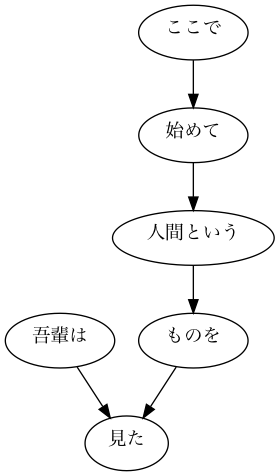

In [45]:
for sentence in islice(make_chunk_object_list(), 5, 6): make_dot_graph(sentence)
Image(filename = '../work/tree.png')

In [33]:
from itertools import combinations

with open('work/49_result.txt', 'w') as f_49:
    for sentence in make_chunk_object_list():
        for idx_i, idx_j in combinations(Chunk.get_noun_clause_idx(sentence), 2):
            path_i = [sentence[idx_i].replace_surface('X')]
            dst_num = sentence[idx_i].dst
            while dst_num != -1:
                if dst_num == idx_j:
                    path_i.append(sentence[dst_num].replace_surface('Y'))
                    f_49.write(' -> '.join(path_i) + '\n')
                    break
                else:
                    path_i.append(sentence[dst_num].get_morph_surface())
                    dst_num = sentence[dst_num].dst

            path_j = [sentence[idx_j].replace_surface('Y')]
            dst_num = sentence[idx_j].dst
            while dst_num != -1:
                path_j.append(sentence[dst_num].get_morph_surface())
                if path_j[-1] in path_i:
                    path_i_str = ' -> '.join(path_i[:path_i.index(path_j[-1])])
                    path_j_str = ' -> '.join(path_j[:-1])
                    f_49.write(' | '.join([path_i_str, path_j_str, path_j[-1]]) + '\n')
                    break    
                dst_num = sentence[dst_num].dst

In [58]:
!head -50 work/49_result.txt

Xは -> Yである
Xで -> 生れたか | Yが | つかぬ
Xでも -> 薄暗い -> Yで
Xでも -> 薄暗い -> 所で | Y | 泣いて
Xでも -> 薄暗い -> 所で -> 泣いて | Yだけは | 記憶している
Xでも -> 薄暗い -> 所で -> 泣いて -> Yしている
Xで | Y | 泣いて
Xで -> 泣いて | Yだけは | 記憶している
Xで -> 泣いて -> Yしている
X -> 泣いて | Yだけは | 記憶している
X -> 泣いて -> Yしている
Xだけは -> Yしている
Xは | Yで -> 始めて -> 人間という -> ものを | 見た
Xは | Yという -> ものを | 見た
Xは | Yを | 見た
Xで -> 始めて -> Yという
Xで -> 始めて -> 人間という -> Yを
Xという -> Yを
Xで -> 聞くと | Yは | 種族であったそうだ
Xで -> 聞くと | Yという -> 人間中で | 種族であったそうだ
Xで -> 聞くと | YYで | 種族であったそうだ
Xで -> 聞くと | Y -> 獰悪な | 種族であったそうだ
Xで -> 聞くと | Yな | 種族であったそうだ
Xで -> 聞くと -> YであったYだ
Xは | Yという -> 人間中で | 種族であったそうだ
Xは | YYで | 種族であったそうだ
Xは | Y -> 獰悪な | 種族であったそうだ
Xは | Yな | 種族であったそうだ
Xは -> YであったYだ
Xという -> YYで
Xという -> 人間中で | Y -> 獰悪な | 種族であったそうだ
Xという -> 人間中で | Yな | 種族であったそうだ
Xという -> 人間中で -> YであったYだ
XXで | Y -> 獰悪な | 種族であったそうだ
XXで | Yな | 種族であったそうだ
XXで -> YであったYだ
X -> Yな
X -> 獰悪な -> YであったYだ
Xな -> YであったYだ
XというXは | Yを -> 捕えて -> 煮て -> 食うという | 話である
XというXは -> Yである
Xを -> 捕えて -> 煮て -> 食うという -> Yである
Xは | Yという -> 考も | なかったから
Xは | 